<a href="https://colab.research.google.com/github/lakshmant-thota/ml_zoomcamp/blob/master/ml2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv

--2025-03-18 05:19:01--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1.41M  --.-KB/s    in 0.04s   

2025-03-18 05:19:02 (33.8 MB/s) - ‘data.csv’ saved [1475504/1475504]



In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [7]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [8]:
df.dtypes

,0
make,object
model,object
year,int64
engine_fuel_type,object
engine_hp,float64
engine_cylinders,float64
transmission_type,object
driven_wheels,object
number_of_doors,float64
market_category,object


In [9]:
object_list = list(df.columns[df.dtypes == 'object'])

In [10]:
object_list

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [11]:
for col in object_list:
  df[col] = df[col].str.lower().str.replace(' ', '_')

# EDA

In [12]:
for col in df.columns:
  print(col)
  print(df[col].unique()[:5])
  print(df[col].nunique())
  print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

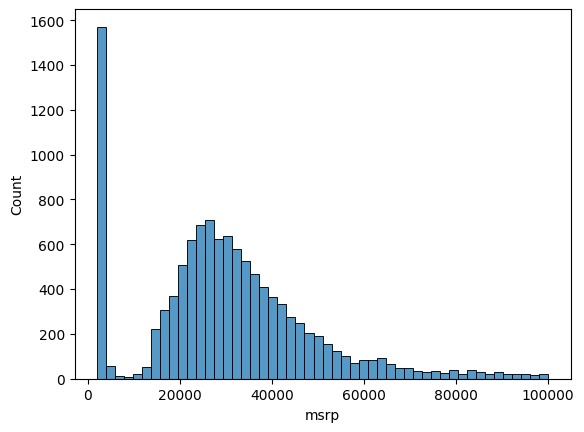

In [18]:
sns.histplot(df.msrp[df['msrp']<100000],bins = 50)

<Axes: xlabel='msrp', ylabel='Count'>

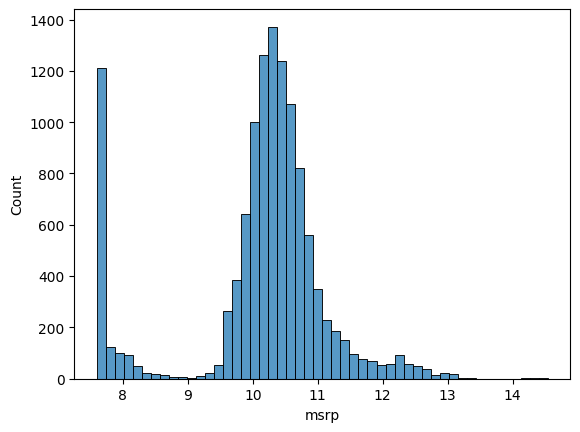

In [23]:
sns.histplot(np.log1p(df.msrp),bins = 50)

missingvalues


In [25]:
df.isnull().sum()

,0
make,0
model,0
year,0
engine_fuel_type,3
engine_hp,69
engine_cylinders,30
transmission_type,0
driven_wheels,0
number_of_doors,6
market_category,3742


In [26]:
df.market_category.head()

,market_category
0,"factory_tuner,luxury,high-performance"
1,"luxury,performance"
2,"luxury,high-performance"
3,"luxury,performance"
4,luxury


# Setting up validation framework

we need to spli the dataset into three parts calleld train test and split

In [29]:
df.shape

(11914, 16)

In [30]:
n = df.shape[0]

In [36]:

n_val = int(0.2*n)
n_test = int(0.2*n)
n_train = n-n_val-n_test

In [37]:
n,n_train+n_val+n_test

(11914, 11914)

In [40]:
df.iloc[1:3]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350


In [43]:
df_val = df.iloc[:n_val]
df_test = df.iloc[n_val:n_val+n_test]
df_train = df.iloc[n_val+n_test:]

In [44]:
df_val

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,porsche,cayenne,2016,premium_unleaded_(required),570.0,8.0,automatic,all_wheel_drive,4.0,"crossover,luxury,high-performance",midsize,4dr_suv,21,14,1715,157300
2378,porsche,cayenne,2016,diesel,240.0,6.0,automatic,all_wheel_drive,4.0,"crossover,luxury,diesel",midsize,4dr_suv,29,20,1715,62300
2379,porsche,cayenne,2017,premium_unleaded_(required),520.0,8.0,automatic,all_wheel_drive,4.0,"crossover,luxury,performance",midsize,4dr_suv,21,14,1715,116500
2380,porsche,cayenne,2017,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,luxury",midsize,4dr_suv,24,18,1715,59600


In [49]:
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)

In [56]:
df_val = df.iloc[idx[:n_val]]
df_test = df.iloc[idx[n_val:n_val+n_test]]
df_train = df.iloc[idx[n_val+n_test:]]

In [58]:
len(df_val),len(df_test),len(df_train)

(2382, 2382, 7150)

In [57]:
df_test.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
3292,nissan,cube,2014,regular_unleaded,122.0,4.0,automatic,front_wheel_drive,4.0,NaN,compact,wagon,31,27,2009,19000
4239,suzuki,esteem,2001,regular_unleaded,122.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,wagon,32,24,481,14499
6937,tesla,model_s,2016,electric,NaN,0.0,direct_drive,all_wheel_drive,4.0,"exotic,high-performance",large,sedan,100,91,1391,112000
1712,mazda,b-series_pickup,2000,flex-fuel_(unleaded/e85),143.0,6.0,manual,rear_wheel_drive,4.0,flex_fuel,compact,extended_cab_pickup,21,16,586,3107
11742,cadillac,xt5,2017,premium_unleaded_(required),310.0,6.0,automatic,front_wheel_drive,4.0,"crossover,luxury",midsize,4dr_suv,27,19,1624,44895


In [59]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [60]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [61]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

# Linear Regression

g(xi) = yi (xi is a car and yi is the price that we are going to predict
xi  are the characteristics of the car and yi will the predicted price

In [63]:
df_train.iloc[10]

,10
make,chevrolet
model,trailblazer_ext
year,2004
engine_fuel_type,regular_unleaded
engine_hp,275.0
engine_cylinders,6.0
transmission_type,automatic
driven_wheels,rear_wheel_drive
number_of_doors,4.0
market_category,NaN


In [66]:
xi = [275,13,1385]

lets predict the price of this car g(xi) = w0 + w1x1 + w2x2 + ....
g(xi) = w0 + wixi

In [65]:
w0 = 0
w = [1,1,1]

In [67]:
def linear_regression(xi):
  n = len(xi)

  pred = w0
  for i in range(n):
    pred += w[i]*xi[i]
  return pred

In [68]:
xi = [275,13,1385]
w0 = 7.17
w = [0.01,0.04,0.002]

In [69]:
linear_regression(xi)

13.209999999999999

In [71]:
np.expm1(linear_regression(xi))

np.float64(545794.6951524466)

In [73]:
np.expm1(y_train[10])

np.float64(31969.999999999975)

# Linear Regression Vector Form

In [74]:
def dot(xi,w):
  n = len(xi)

  res = 0.0
  for j in range(n):
    res += xi[j]*w[j]
  return res

In [ ]:
def linear_regression(xi):
  return w0 + dot(xi,w)

g(xi) = w0 + <xiwi
g(xi) = w0xi0 + <xiwi
w = [w0,w1,w2,......wn]
xi = [x0,x1,x2.......xn]

In [75]:
w_new = [w0] +w
w_new

[7.17, 0.01, 0.04, 0.002]

In [76]:
def linear_regression(xi):
  xi = [1] + xi
  return dot(xi,w_new)

In [77]:
linear_regression(xi)

13.209999999999999

# Training a regression model

In [ ]:
x = [[]]

xw = y  
xt * xw = xt * y  
xt*x is called gram matric and for this matrix inverse can exist  
w = (xt*x)-1 *xt *y



In [ ]:
def train_linear_regression(X,y):
  ones = np.ones(X.shape[0])

In [79]:
import numpy as np

# Generate a 3x10 matrix of random integers between 0 and 9 (inclusive)
matrix = np.random.randint(20, 1500, size=(10, 3))

# Print the matrix
print(matrix)

[[ 419  844  521]
 [1204  763  593]
 [1202  557 1370]
 [ 556  219 1290]
 [ 740  487 1491]
 [1131  929  482]
 [ 927  994  165]
 [ 209  452  535]
 [1217 1095  385]
 [1287 1177 1046]]


In [81]:
x = matrix
x

array([[ 419,  844,  521],
       [1204,  763,  593],
       [1202,  557, 1370],
       [ 556,  219, 1290],
       [ 740,  487, 1491],
       [1131,  929,  482],
       [ 927,  994,  165],
       [ 209,  452,  535],
       [1217, 1095,  385],
       [1287, 1177, 1046]])

In [94]:
ones = np.ones(x.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [92]:
x = np.column_stack([ones,x])
x

array([[1.000e+00, 4.190e+02, 8.440e+02, 5.210e+02],
       [1.000e+00, 1.204e+03, 7.630e+02, 5.930e+02],
       [1.000e+00, 1.202e+03, 5.570e+02, 1.370e+03],
       [1.000e+00, 5.560e+02, 2.190e+02, 1.290e+03],
       [1.000e+00, 7.400e+02, 4.870e+02, 1.491e+03],
       [1.000e+00, 1.131e+03, 9.290e+02, 4.820e+02],
       [1.000e+00, 9.270e+02, 9.940e+02, 1.650e+02],
       [1.000e+00, 2.090e+02, 4.520e+02, 5.350e+02],
       [1.000e+00, 1.217e+03, 1.095e+03, 3.850e+02],
       [1.000e+00, 1.287e+03, 1.177e+03, 1.046e+03]])

In [95]:
# w = (xt*x)-1 * xt * y

In [97]:
xtx = x.T.dot(x)

In [98]:
xtx_inv = np.linalg.inv(xtx)

In [99]:
 y = np.random.randint(100,250,size=(10))

In [100]:
y

array([207, 123, 102, 227, 107, 210, 207, 173, 154, 238])

In [101]:
w_full = xtx_inv.dot(x.T).dot(y)

In [102]:
w0 = w_full[0]
w = w_full[1:]

In [103]:
w0,w

(np.float64(151.63039846412164),
 array([-0.08046067,  0.1152666 ,  0.01024286]))

In [104]:
def train_lr(x,y):
  ones = np.ones(x.shape[0])
  x = np.column_stack([ones,x])

  xtx = x.T.dot(x)
  xtx_inv = np.linalg.inv(xtx)
  w_full = xtx_inv.dot(x.T).dot(y)

  return w_full[0],w_full[1:]